<p style="color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:40px; font-style:normal"><b>GENERATION D'IMAGES</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2023-01</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

L'objectif de cette feuille d'exercices est d'illustrer le principe de ***génération d'images par algorithmes***. L'ensemble des exercices vont mettre en oeuvre les fonctionnalités fournies par le package **`numpy`**, basées sur l'utilisation du conteneur **`array`** et des fonctions universelles pour manipuler les données stockées dans ce conteneur. Avant de commencer cette feuille d'exercices, il est donc fortement recommandé de relire le notebook **04-Numpy.ipynb** qui contient les éléments de cours correspondants.

> **Remarque importante :** Pour bénéficier du gain de vitesse fourni par le mécanisme de **vectorisation** qu'offrent les fonctions universelles, il est primordial de raisonner uniquement en manipulations globales des vecteurs et des matrices, et ceci pour l'ensemble des traitements à effectuer. Par conséquent ***aucune boucle **`for`** ou **`while`** ne devra être utilisée dans aucun des exercices de cette feuille !***

Le package **`numpy`** permet de créer des matrices de dimension quelconque, dont les éléments doivent tous être de même type. Mais dans le cadre de l'imagerie numérique, ***on va exclusivement utiliser 5 formes de matrices*** :

- Matrice MxN de booléens = **image binaire** (chaque pixel est défini par un booléen)
- Matrice MxN de réels = **image monochrome à valeurs continues** (chaque pixel est défini par un réel)
- Matrice MxN d'entiers = **image monochrome à valeurs discrètes** (chaque pixel est défini par un entier)
- Matrice MxNx3 de réels = **image polychrome à valeurs continues** (chaque pixel est défini par trois réels)
- Matrice MxNx3 d'entiers = **image polychrome à valeurs discrètes** (chaque pixel est défini par trois entiers)

---
Pour simplifier la vérification du code à écrire dans les exercices, on fournit une fonction **`view`** qui permet d'afficher une matrice **`numpy`** sous la forme d'une image insérée dans le notebook, à condition qu'elle utilise l'une des 5 formes définies ci-dessus. Voici quelques exemple de mise en oeuvre :

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
from SRC.tools import show, view # import de deux fonctions du module 'tools'

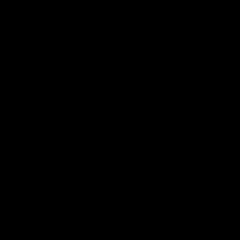

img.shape ━► (240, 240)
img.size ━► 57600
img.dtype ━► float64
img.nbytes ━► 460800
img ━►
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

img[0,0] ━► 0.0
img[0,:5] ━► [0. 0. 0. 0. 0.]
img[-1,::20] ━► [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
img = np.zeros((240, 240)) # image monochrome noire (valeurs réelles pour les pixels)
#img = np.ones((240, 240)) # image monochrome blanche (valeurs réelles pour les pixels)
#img = np.full((240, 240), False) # image binaire noire (valeurs booléennes pour les pixels)
#img = np.full((240, 240), 0) # image monochrome noire (valeurs entières pour les pixels)
#img = np.full((240, 240), 0.0) # image monochrome noire (valeurs réelles pour les pixels)
#img = np.full((240, 240, 3), [0,0,0]) # image polychrome noire (valeurs entières pour les pixels)
#img = np.full((240, 240, 3), [1,0,0]) # image polychrome rouge (valeurs entières pour les pixels)
#img = np.full((240, 240, 3), [1,0.5,0]) # image polychrome orange (valeurs réelles pour les pixels)
#img = np.full((240, 240, 3), [255,0,0]) # image polychrome rouge (valeurs entières pour les pixels)

view(img) # affichage de la matrice sous forme d'image
show("img.shape; img.size; img.dtype; img.nbytes; img#;") # affichage des attributs de la matrice
show("img[0,0]; img[0,:5]; img[-1,::20]") # affichage de pixels ou tranches de pixels

<h2 style="padding:16px; color:white; background:#07D">Exercice A1 - Génération d'aplats rectangulaires [grids]</h2>

Ecrire les instructions Python permettant de générer les 12 images de la figure ci-dessous. Chaque image individuelle devra avoir une taille de 240 sur 240. Vous aurez besoin des fonctions suivantes fournies par le package **`numpy`** (à vous de trouver leur rôle et ceux de leurs paramètres) :

- **`np.indices(size)`**
- **`np.repeat(array, repeats, [axis=n])`**
- **`np.min(array_or_tuple_of_arrays, [axis=n])`**
- **`np.max(array_or_tuple_of_arrays, [axis=n])`**
- **`np.random.randint(low, high, size)`**
- **`np.random.random(size)`**

![](IMG/grids.png 'grids.png')

In [ ]:
# TODO
view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

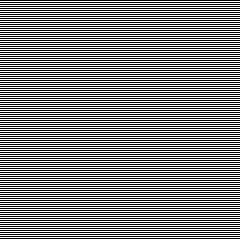

(240, 240) / min = 0 / max = 1


In [3]:
rows, cols = np.indices((240, 240)) # création des matrices d'indices pour une image 240x240

# En appliquant un 'modulo 2', les lignes paires deviennent noires (= 0) et les impaires blanches (= 1)
img = rows % 2 # pixel-stripes (largeur = 1 pixel)

# Pour augmenter l'épaisseur des lignes, on rajoute une division entière sur les indices de lignes
#img = rows//6 % 2 # stripes (largeur = 6 pixels)

# Pour l'échiquier, le 'modulo 2' s'applique à la somme des indices de lignes et de colonnes
#img = (rows + cols) % 2 # pixel-chessboard (taille des cases = 1 pixel)
#img = (rows//30 + cols//30) % 2 # chessboard (taille des cases = 30x30 pixels)

# Pour les boîtes imbriquées, on calcule la distance minimale de chaque pixel aux bordures N,E,S,W
#img = np.min((rows, cols, 239-rows, 239-cols), axis=0) % 2 # pixel-boxes (largeur = 1 pixel)
#img = np.min((rows//16, cols//16, 14-rows//16, 14-cols//16), axis=0) % 2 # boxes (largeur = 16 pixels)

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

<h2 style="padding:16px; color:white; background:#07D">Exercice A2 - Génération de dégradés axiaux [ramps]</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus de certaines des fonctions de l'exercice précédent, vous aurez également besoin des fonctions suivantes :

- **`np.linspace(start, stop, samples)`**
- **`np.tile(array, repeats)`**
- **`np.divmod(number_or_array, number_or_array)`**
- **`np.where(test, true_value, false_value)`**

![](IMG/ramps.png 'ramps.png')

In [ ]:
# TODO
view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

<h2 style="padding:16px; color:white; background:#07D">Exercice A3 - Génération de dégradés circulaires [spots]</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus de certaines des fonctions de l'exercice précédent, vous aurez également besoin des fonctions suivantes :

- **`np.meshgrid(samples_for_x, samples_for_y)`**
- **`np.clip(array, lower_bound, upper_bound)`**
- **`np.hstack(tuple_of_arrays)`** ou **`np.vstack(tuple_of_arrays)`**
- **`np.sin(array)`** ou **`np.cos(array)`** ou **`np.atan2(y, x)`**

![](IMG/spots.png 'spots.png')

In [ ]:
# TODO
view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

---